# Imports

In [2]:
from tqdm import tqdm
import joblib

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from skimage import data, color, feature
from skimage.transform import resize, rescale

from utils import (
    non_max_suppression,
    sliding_window,
    detections_by_scale,
    evaluate_detections_by_scale,
    global_multiscale_detection,
    evaluate_detections_at_scale
)

# Clasificador

In [3]:
# Cargar modelo entrenado
clf = joblib.load('modelo_entrenado.joblib')

# Cargar standard scaler
scaler = joblib.load('scaler.joblib')

# Cargar pca
pca = joblib.load('pca.joblib')

# Tamaño de las imagenes de entrenamiento
size = (64,64)

# Imagen de prueba

In [4]:
# Imagen de prueba
test_image = data.astronaut()
test_image = color.rgb2gray(test_image)
test_image = (test_image*255).astype(np.uint8)
test_image = rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]
test_image = rescale(test_image, 0.8)

In [5]:
test_image.shape

(128, 112)

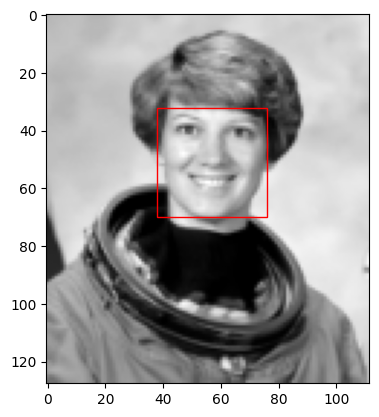

In [6]:
# Visualizamos la imagen
# Buscamos la escala de los rostros
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')

true_scale = 0.6
Ni, Nj = (int(true_scale * s) for s in size)

ax.add_patch(plt.Rectangle((38, 32), Nj, Ni, edgecolor='red', alpha=1, lw=1, facecolor='none'))
plt.show()

# Desempeño según umbrales

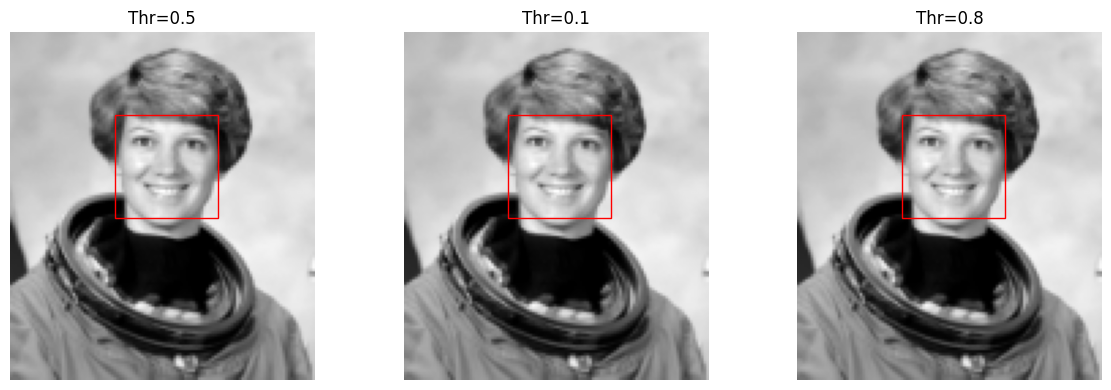

In [7]:
detecciones = evaluate_detections_at_scale(
    image=test_image,
    clf=clf,
    scaler=scaler,
    pca=pca,
    scale=true_scale,
    thresholds=[0.5, 0.1, 0.8],
    patch_size=(64, 64),
    overlapThresh=0.1,
    plot=True
)

### Desempeño en varias escalas según umbral

100%|██████████| 20/20 [01:20<00:00,  4.03s/it]


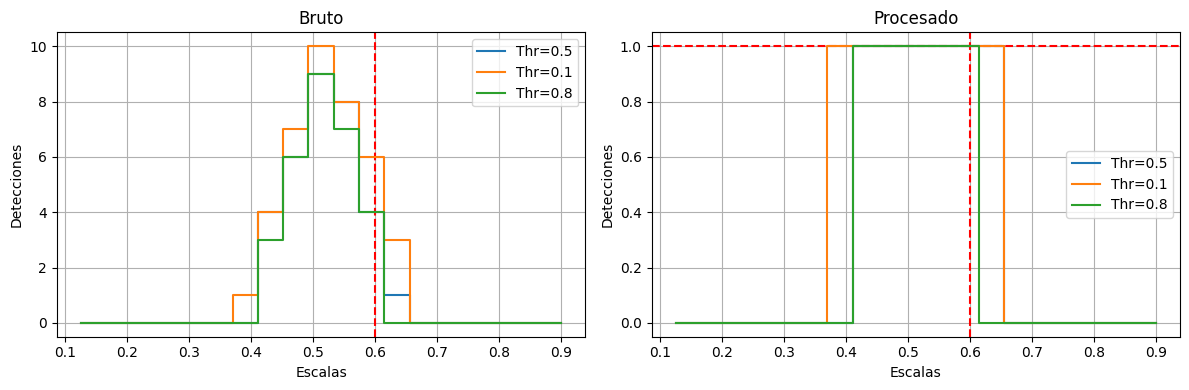

In [9]:
test_scales = np.linspace(0.125, 0.9, 20)

raw_detections, detections = evaluate_detections_by_scale(
    test_image,
    test_scales,
    clf=clf,
    scaler=scaler,
    pca=pca,
    thresholds=[0.5, 0.1, 0.8],
    patch_size=(64, 64),
    step=2,
    true_scale=true_scale,
    number_faces=1
)

# Detección global

Escalas: 100%|██████████| 20/20 [01:19<00:00,  3.99s/it]


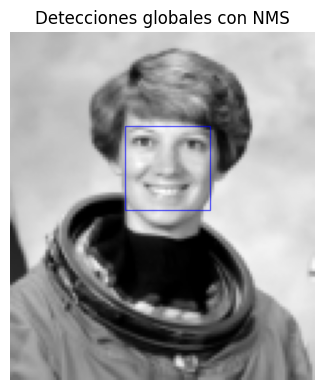

In [10]:
filtered_indices, filtered_sizes = global_multiscale_detection(
    test_image,
    clf=clf,
    scaler=scaler,
    pca=pca,
    test_scales=np.linspace(0.125, 0.9, 20),
    patch_size=(64, 64),
    threshold=0.1,
    step=2,
    overlapThresh=0.3,
    plot=True
)